In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split   
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import MiniBatchKMeans

In [2]:
data = pd.read_csv("Amazon Kindle.csv", engine = "python")
data.head()

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars
0,http://www.amazon.com/How-Bartender-Bartending...,How to be a Bartender: Get a Bartending Job Wi...,Dave Allred,9.99,NaN,171.0,"In his revolutionary new book, Dave Allred (Th...",249.0,NaN,English,Enabled,Not Enabled,Enabled,23.0,4.9
1,http://www.amazon.com/Raise-Bar-Action-Based-C...,Raise the Bar: An Action-Based Method for Maxi...,Jon Taffer,2.00,24.00,258.0,If thereâ€™s anyone who can prevent a bar or r...,1427.0,Amazon Publishing,English,Enabled,Enabled,Enabled,80.0,4.7
2,http://www.amazon.com/The-Professional-Bartend...,The Professional Bartender's Handbook: A Recip...,Valerie Mellema,9.87,12.08,288.0,The Professional Bartenders Handbook is writte...,5643.0,Atlantic Publishing Group Inc.; illustrated ed...,English,Enabled,Not Enabled,Not Enabled,32.0,4.2
3,http://www.amazon.com/Double-Your-Tips-Jerry-M...,How to Double Your Tips [Kindle Edition],Jerry Minchey,2.99,NaN,36.0,"How to Double Your Tips (For every waitress, w...",98.0,Stony River Media,English,Enabled,Not Enabled,Enabled,6.0,4.5
4,http://www.amazon.com/The-Bartenders-Bible-Mix...,The Bartender's Bible: 1001 Mixed Drinks [Kind...,Gary Regan,5.99,2.00,400.0,Mix Drinks Like A Pro Now you can with this in...,647.0,HarperCollins e-books,English,Enabled,Not Enabled,Not Enabled,59.0,3.6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58845 entries, 0 to 58844
Data columns (total 15 columns):
url                 58845 non-null object
title               52410 non-null object
author              49637 non-null object
price               51318 non-null float64
save                36314 non-null float64
pages               55729 non-null float64
description         49197 non-null object
size                50425 non-null float64
publisher           50521 non-null object
language            57136 non-null object
text_to_speech      47702 non-null object
x_ray               47713 non-null object
lending             47795 non-null object
customer_reviews    50886 non-null float64
stars               50886 non-null float64
dtypes: float64(6), object(9)
memory usage: 6.7+ MB


In [4]:
data["language"].unique().tolist()

['English', nan]

In [5]:
data.describe()

,price,save,pages,size,customer_reviews,stars
count,51318.000000,36314.000000,55729.000000,5.042500e+04,50886.000000,50886.000000
mean,8.978717,8.936999,321.445836,6.951410e+03,114.527709,4.280057
std,13.858551,9.735639,353.377820,1.029392e+06,404.724384,0.504977
min,0.000000,0.010000,0.000000,3.000000e-01,1.000000,1.000000
25%,2.990000,4.960000,164.000000,3.960000e+02,11.000000,4.000000
50%,6.990000,7.000000,272.000000,7.050000e+02,31.000000,4.400000
75%,9.990000,11.000000,368.000000,1.737000e+03,87.000000,4.600000
max,1200.000000,269.460000,10221.000000,2.311415e+08,19723.000000,5.000000


In [6]:
data.isnull().sum()

url                     0
title                6435
author               9208
price                7527
save                22531
pages                3116
description          9648
size                 8420
publisher            8324
language             1709
text_to_speech      11143
x_ray               11132
lending             11050
customer_reviews     7959
stars                7959
dtype: int64

In [7]:
data.dropna(axis = 0,inplace = True)
data.head()

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars
1,http://www.amazon.com/Raise-Bar-Action-Based-C...,Raise the Bar: An Action-Based Method for Maxi...,Jon Taffer,2.00,24.00,258.0,If thereâ€™s anyone who can prevent a bar or r...,1427.0,Amazon Publishing,English,Enabled,Enabled,Enabled,80.0,4.7
2,http://www.amazon.com/The-Professional-Bartend...,The Professional Bartender's Handbook: A Recip...,Valerie Mellema,9.87,12.08,288.0,The Professional Bartenders Handbook is writte...,5643.0,Atlantic Publishing Group Inc.; illustrated ed...,English,Enabled,Not Enabled,Not Enabled,32.0,4.2
4,http://www.amazon.com/The-Bartenders-Bible-Mix...,The Bartender's Bible: 1001 Mixed Drinks [Kind...,Gary Regan,5.99,2.00,400.0,Mix Drinks Like A Pro Now you can with this in...,647.0,HarperCollins e-books,English,Enabled,Not Enabled,Not Enabled,59.0,3.6
5,http://www.amazon.com/The-Fallen-Angel-Novel-G...,The Fallen Angel: A Novel (Gabriel Allon) [Kin...,Daniel Silva,6.64,3.35,417.0,"Art restorer, assassin, spyâ€”Gabriel Allon re...",634.0,Harper,English,Enabled,Enabled,Not Enabled,1031.0,4.4
6,http://www.amazon.com/Bartenders-Black-Book-Up...,"The Bartenders Black Book, Updated 9th Edition...",Stephen Kittredge Cunningham,5.99,6.96,288.0,The newest and ninth edition to the Bartenders...,1163.0,Wine Appreciation Guild; 9 edition,English,Enabled,Not Enabled,Enabled,40.0,4.5


### EDA
### Which are the most occurence book and who is the best Author
Best author is based on the sales of all of an author's books.

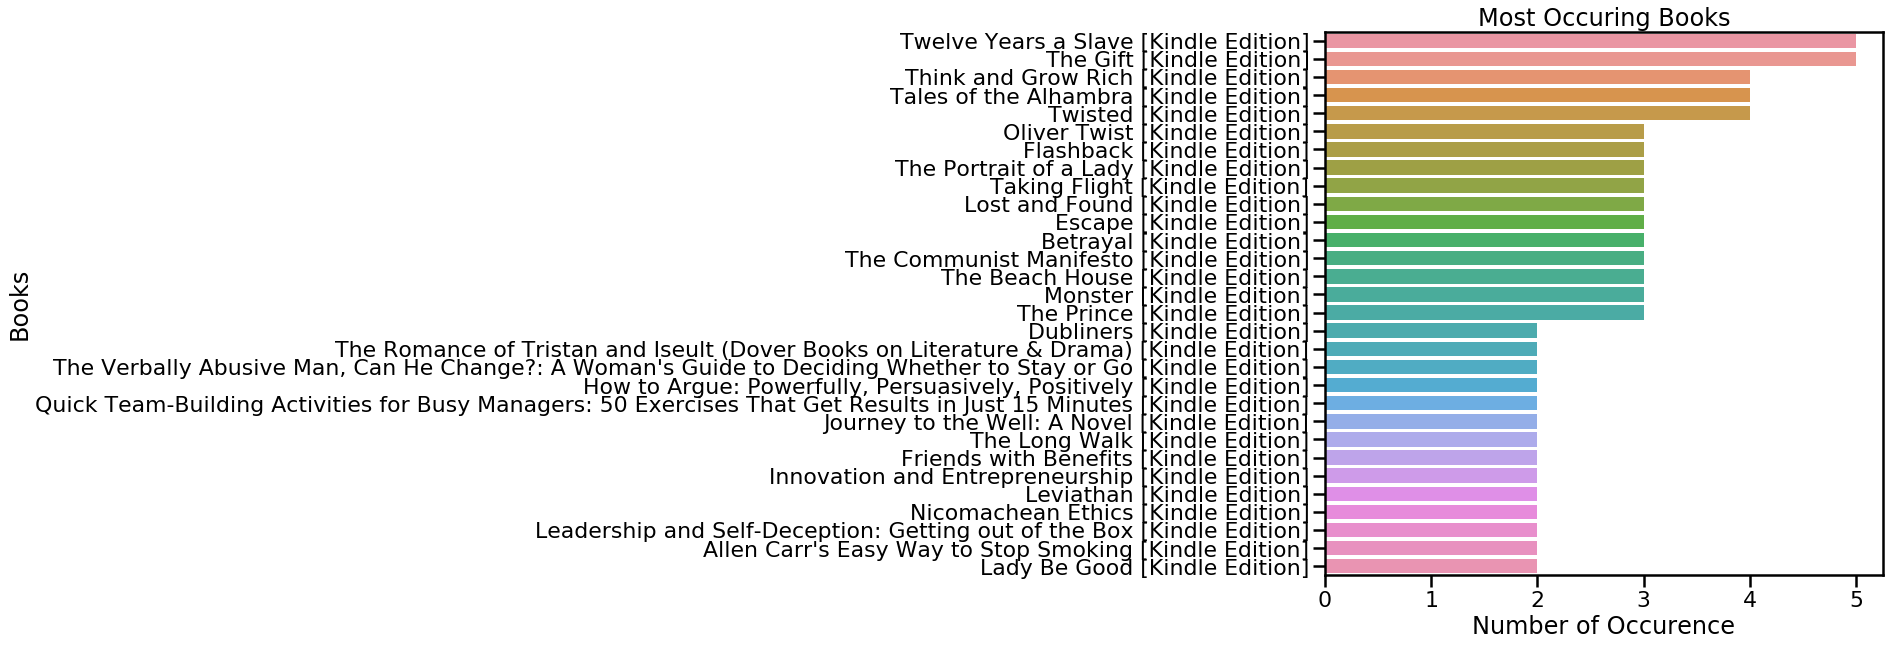

In [8]:
sns.set_context('poster')
fig = plt.figure(figsize = (10,10))
books = data["title"].value_counts()[:30]
a = sns.barplot(x = books, y = books.index)
plt.title("Most Occuring Books")
plt.xlabel("Number of Occurence")
plt.ylabel("Books")
plt.show()

In [9]:
# Create revenue column multiplying price and Number of customer reviews(as we don't know how many copies are sold)
data["revenue"]= data["price"]*data["customer_reviews"]
data.head()

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars,revenue
1,http://www.amazon.com/Raise-Bar-Action-Based-C...,Raise the Bar: An Action-Based Method for Maxi...,Jon Taffer,2.00,24.00,258.0,If thereâ€™s anyone who can prevent a bar or r...,1427.0,Amazon Publishing,English,Enabled,Enabled,Enabled,80.0,4.7,160.00
2,http://www.amazon.com/The-Professional-Bartend...,The Professional Bartender's Handbook: A Recip...,Valerie Mellema,9.87,12.08,288.0,The Professional Bartenders Handbook is writte...,5643.0,Atlantic Publishing Group Inc.; illustrated ed...,English,Enabled,Not Enabled,Not Enabled,32.0,4.2,315.84
4,http://www.amazon.com/The-Bartenders-Bible-Mix...,The Bartender's Bible: 1001 Mixed Drinks [Kind...,Gary Regan,5.99,2.00,400.0,Mix Drinks Like A Pro Now you can with this in...,647.0,HarperCollins e-books,English,Enabled,Not Enabled,Not Enabled,59.0,3.6,353.41
5,http://www.amazon.com/The-Fallen-Angel-Novel-G...,The Fallen Angel: A Novel (Gabriel Allon) [Kin...,Daniel Silva,6.64,3.35,417.0,"Art restorer, assassin, spyâ€”Gabriel Allon re...",634.0,Harper,English,Enabled,Enabled,Not Enabled,1031.0,4.4,6845.84
6,http://www.amazon.com/Bartenders-Black-Book-Up...,"The Bartenders Black Book, Updated 9th Edition...",Stephen Kittredge Cunningham,5.99,6.96,288.0,The newest and ninth edition to the Bartenders...,1163.0,Wine Appreciation Guild; 9 edition,English,Enabled,Not Enabled,Enabled,40.0,4.5,239.60


### Best Author is Suzzane Collins

In [10]:
data_author = data[["title","author","customer_reviews","stars","revenue"]]

In [11]:
data_author1 = data_author.groupby(["author"],as_index= False)["revenue"].sum()
data_author2 = data_author1.sort_values("revenue",ascending = False).head(10)
data_author2

,author,revenue
17263,Suzanne Collins,485644.69
4944,E L James,266194.90
7636,James Patterson,207654.46
16819,Stephen King,205240.73
18257,Veronica Roth,188304.43
16875,Stephenie Meyer,166992.48
6372,Gillian Flynn,157810.26
13413,Nicholas Sparks,146153.17
7329,J.R.R. Tolkien,130983.23
8951,John Grisham,107823.77


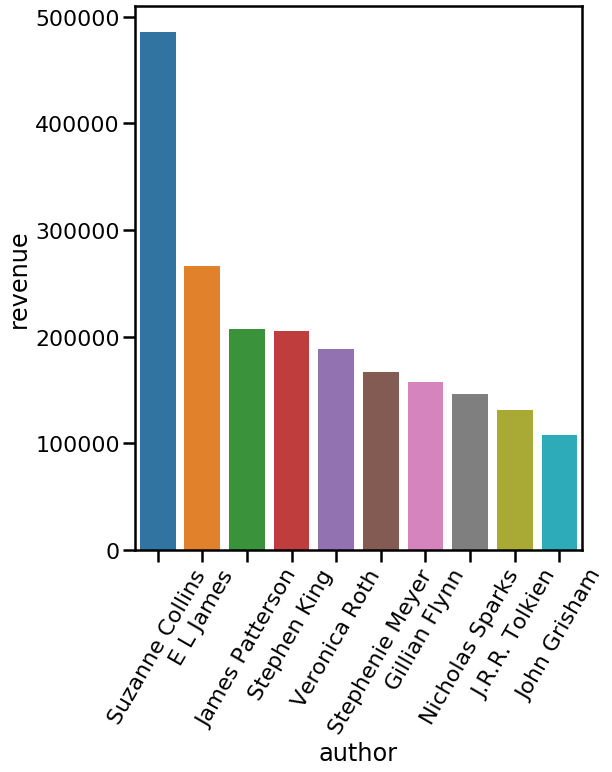

In [12]:
plt.figure(figsize = (8,10))
a = sns.barplot(x = "author", y = "revenue", data = data_author2)
plt.xticks(rotation = 60)
plt.show()

### Top 10 books based on Dollar value/revenue

In [13]:
data_top10 = data_author.groupby(["author","title","customer_reviews"],as_index= False)["revenue"].sum()
data_top10 = data_top10.sort_values("revenue",ascending = False).head(10)
data_top10

,author,title,customer_reviews,revenue
10813,Gillian Flynn,Gone Girl: A Novel [Kindle Edition],15866.0,142635.34
8432,E L James,Fifty Shades Trilogy Bundle: Fifty Shades of G...,8266.0,123907.34
29650,Suzanne Collins,The Hunger Games Trilogy [Kindle Edition],6616.0,115713.84
29651,Suzanne Collins,The Hunger Games [Kindle Edition],19723.0,98417.77
29649,Suzanne Collins,Mockingjay (The Final Book of The Hunger Games...,13807.0,96372.86
12521,J.R.R. Tolkien,The Hobbit [Kindle Edition],5932.0,82810.72
29646,Suzanne Collins,Catching Fire (The Second Book of the Hunger G...,13191.0,82048.02
29647,Suzanne Collins,Catching Fire: Movie Tie-in Edition: The Secon...,13191.0,78618.36
8431,E L James,Fifty Shades Freed: Book Three of the Fifty Sh...,9217.0,71892.60
18291,Laura Hillenbrand,"Unbroken: A World War II Story of Survival, Re...",6461.0,71006.39


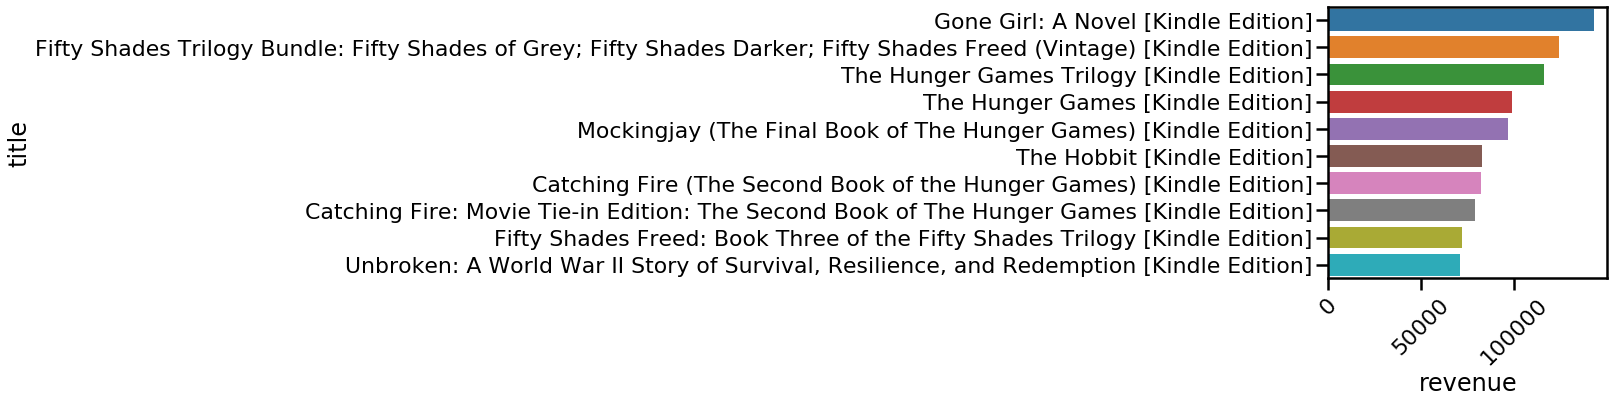

In [14]:
plt.figure(figsize = (5,5))
a = sns.barplot(x = "revenue", y = "title", data = data_top10)
plt.xticks(rotation = 45)
plt.show()

### Top 10 books based on number of copies

In [15]:
data_top10 = data_author.groupby(["author","title","customer_reviews"],as_index= False)["revenue"].sum()
data_top10 = data_top10.sort_values("customer_reviews",ascending = False).head(10)
data_top10

,author,title,customer_reviews,revenue
29651,Suzanne Collins,The Hunger Games [Kindle Edition],19723.0,98417.77
10813,Gillian Flynn,Gone Girl: A Novel [Kindle Edition],15866.0,142635.34
29649,Suzanne Collins,Mockingjay (The Final Book of The Hunger Games...,13807.0,96372.86
29647,Suzanne Collins,Catching Fire: Movie Tie-in Edition: The Secon...,13191.0,78618.36
29646,Suzanne Collins,Catching Fire (The Second Book of the Hunger G...,13191.0,82048.02
31380,Veronica Roth,Divergent (Divergent Series) [Kindle Edition],9287.0,43277.42
8431,E L James,Fifty Shades Freed: Book Three of the Fifty Sh...,9217.0,71892.60
8430,E L James,Fifty Shades Darker: Book Two of the Fifty Sha...,9214.0,70394.96
15376,John Green,The Fault in Our Stars [Kindle Edition],8775.0,63092.25
8432,E L James,Fifty Shades Trilogy Bundle: Fifty Shades of G...,8266.0,123907.34


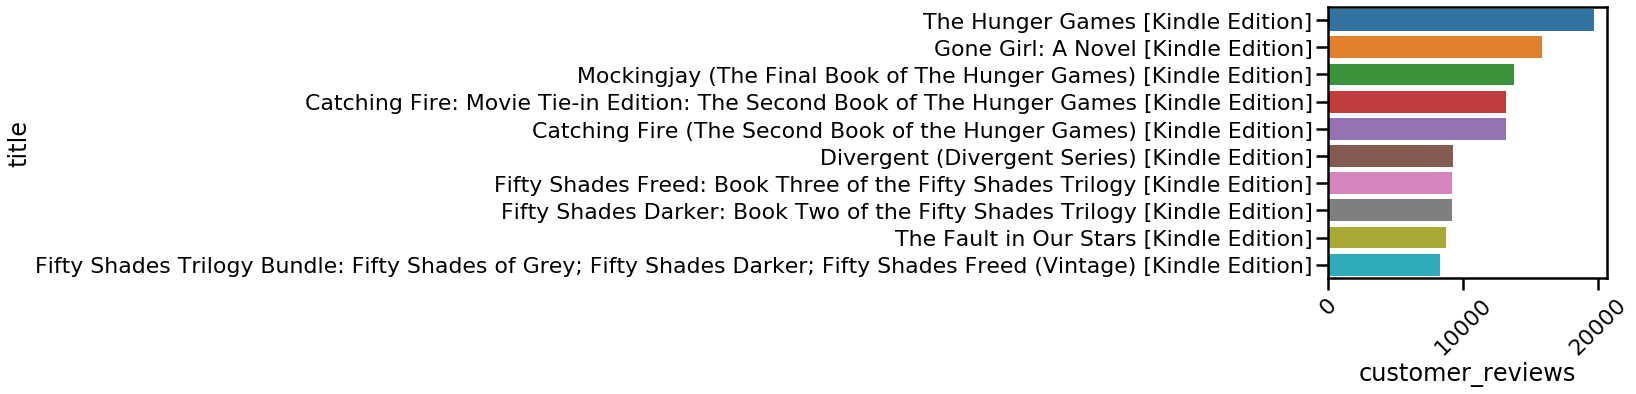

In [16]:
plt.figure(figsize = (5,5))
a = sns.barplot(x = "customer_reviews", y = "title", data = data_top10)
plt.xticks(rotation = 45)
plt.show()

### Is rating dependent on any of the attributes?
No it is not dependent on any other variables

In [17]:
corrmat = data.corr()
corrmat

,price,save,pages,size,customer_reviews,stars,revenue
price,1.000000,0.489153,0.233525,0.162954,-0.056055,0.014894,0.039570
save,0.489153,1.000000,0.184676,0.154055,-0.046905,0.023815,-0.008956
pages,0.233525,0.184676,1.000000,0.089886,0.096139,-0.038571,0.134428
size,0.162954,0.154055,0.089886,1.000000,0.011519,0.013122,0.031523
customer_reviews,-0.056055,-0.046905,0.096139,0.011519,1.000000,-0.019341,0.910537
stars,0.014894,0.023815,-0.038571,0.013122,-0.019341,1.000000,-0.016911
revenue,0.039570,-0.008956,0.134428,0.031523,0.910537,-0.016911,1.000000


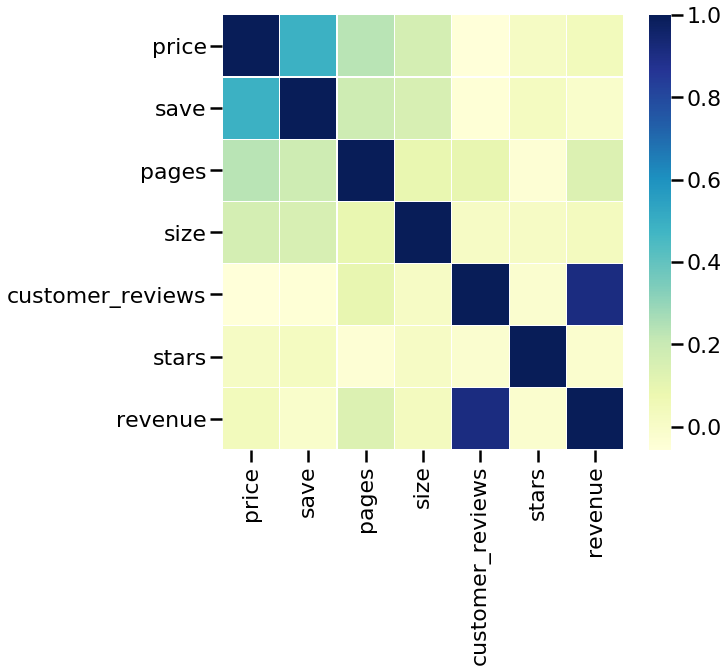

In [18]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
plt.show()

### Which book has the highest ratings or stars

In [19]:
data_author = data[["title","author","customer_reviews","stars","revenue"]]
data_title = data_author.sort_values("stars", ascending= False).head(10)
data_title

,title,author,customer_reviews,stars,revenue
9650,Legendary Detective in the City of Kings (Book...,Kaye Wagner,23.0,5.0,114.77
25321,On the Court with...Dwight Howard (Matt Christ...,Matt Christopher,1.0,5.0,4.27
3250,Coworker Hell: A Retail Hell Underground Digit...,Freeman Hall,1.0,5.0,3.82
25281,Fabulous Chicago: A Great City's History and P...,Emmett Dedmon,2.0,5.0,10.76
43272,Ethics and Professionalism [Kindle Edition],John Kultgen,3.0,5.0,46.47
51477,Nation of Devils [Kindle Edition],Stein Ringen,1.0,5.0,16.99
51485,Facebook Marketing For Dummies (For Dummies (B...,John Haydon,4.0,5.0,55.96
51495,The Cultural Dimension of Global Business (7th...,Gary Ferraro,4.0,5.0,195.52
25314,Stephen Curry: An Unauthorized Biography [Kind...,Belmont and Belcourt Biographies,1.0,5.0,2.51
25320,On the Field with...Derek Jeter (Athlete Biogr...,Matt Christopher,12.0,5.0,56.88


### Cluster the Books based on its description

In [26]:
documents = data["description"]
documents

1        If thereâ€™s anyone who can prevent a bar or r...
2        The Professional Bartenders Handbook is writte...
4        Mix Drinks Like A Pro Now you can with this in...
5        Art restorer, assassin, spyâ€”Gabriel Allon re...
6        The newest and ninth edition to the Bartenders...
                               ...                        
58828    Skirmishes be damned, this is all out war! Mat...
58829    The Broadway Books Library of LarcenyLuc Sante...
58830    """Jay's recollection of pool stories exceeds ...
58832    You have a great writing style, very credible,...
58834    Every spring, the first four days of the NCAA ...
Name: description, Length: 32571, dtype: object

In [31]:
vectorizer = TfidfVectorizer(stop_words= 'english')
X = vectorizer.fit(documents.values)
features = vectorizer.transform(documents.values)
print(X)
print(features)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
  (0, 108025)	0.10359103952177659
  (0, 107006)	0.05091327435125728
  (0, 105905)	0.11076833902454554
  (0, 105889)	0.0660393622278257
  (0, 105049)	0.060285252572470194
  (0, 102344)	0.06184796849313409
  (0, 100173)	0.09946359144540559
  (0, 100079)	0.0568445655434037
  (0, 98966)	0.0751552415818312
  (0, 98723)	0.052849209614577786
  (0, 98541)	0.06511713170368007
  (0, 96941)	0.06444929672005424
  (0, 95080)	0.1342591995813191
  (0, 95079)	0.40277759874395724
  (0, 93533)	0.05005835045587795

TypeError: 'NoneType' object is not subscriptable

### Find out optimum numbers of clusters 
Using MiniBatchKMeans because it is faster in computation

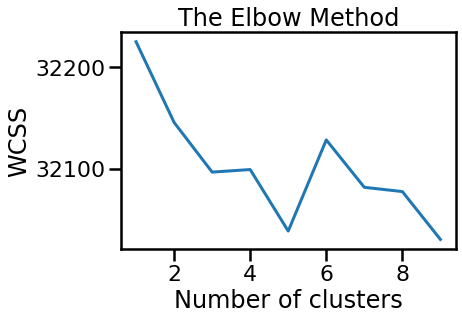

In [36]:
wcss = []
for i in range(1, 10):
    kmeans = MiniBatchKMeans(n_clusters = i, init = 'k-means++', max_iter= 100,random_state = 42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Looks like the 4 is the optimum number of clusters

### KMeans Model

In [38]:
kmean = MiniBatchKMeans(n_clusters = 4, init = 'k-means++',max_iter= 100, n_init= 1, random_state = 42)
kmean.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=4, n_init=1, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [94]:
##Identifying labels
labels = kmean.labels_
labels

array([1, 1, 3, ..., 2, 2, 2])

In [95]:
# Adding labels to data frame
clusters = pd.concat([data,pd.DataFrame({'cluster':labels})],axis = 1)
clusters.dropna(axis = 0, inplace = True)
clusters

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars,revenue,cluster
1,http://www.amazon.com/Raise-Bar-Action-Based-C...,Raise the Bar: An Action-Based Method for Maxi...,Jon Taffer,2.00,24.00,258.0,If thereâ€™s anyone who can prevent a bar or r...,1427.0,Amazon Publishing,English,Enabled,Enabled,Enabled,80.0,4.7,160.00,1.0
2,http://www.amazon.com/The-Professional-Bartend...,The Professional Bartender's Handbook: A Recip...,Valerie Mellema,9.87,12.08,288.0,The Professional Bartenders Handbook is writte...,5643.0,Atlantic Publishing Group Inc.; illustrated ed...,English,Enabled,Not Enabled,Not Enabled,32.0,4.2,315.84,3.0
4,http://www.amazon.com/The-Bartenders-Bible-Mix...,The Bartender's Bible: 1001 Mixed Drinks [Kind...,Gary Regan,5.99,2.00,400.0,Mix Drinks Like A Pro Now you can with this in...,647.0,HarperCollins e-books,English,Enabled,Not Enabled,Not Enabled,59.0,3.6,353.41,3.0
5,http://www.amazon.com/The-Fallen-Angel-Novel-G...,The Fallen Angel: A Novel (Gabriel Allon) [Kin...,Daniel Silva,6.64,3.35,417.0,"Art restorer, assassin, spyâ€”Gabriel Allon re...",634.0,Harper,English,Enabled,Enabled,Not Enabled,1031.0,4.4,6845.84,2.0
6,http://www.amazon.com/Bartenders-Black-Book-Up...,"The Bartenders Black Book, Updated 9th Edition...",Stephen Kittredge Cunningham,5.99,6.96,288.0,The newest and ninth edition to the Bartenders...,1163.0,Wine Appreciation Guild; 9 edition,English,Enabled,Not Enabled,Enabled,40.0,4.5,239.60,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435,http://www.amazon.com/A-Writers-Notebook-Ralph...,A Writer's Notebook [Kindle Edition],Ralph Fletcher,5.12,0.87,138.0,"Writers are like other people, except for at l...",211.0,HarperCollins,English,Enabled,Not Enabled,Not Enabled,44.0,4.4,225.28,1.0
32439,http://www.amazon.com/Live-Writing-Ralph-Fletc...,Live Writing [Kindle Edition],Ralph Fletcher,5.12,0.87,147.0,This book is based on the simple idea that eve...,220.0,HarperCollins,English,Enabled,Not Enabled,Not Enabled,14.0,4.1,71.68,3.0
32440,http://www.amazon.com/Mechanically-Inclined-Bu...,"Mechanically Inclined: Building Grammar, Usage...",Jeff Anderson,11.49,11.01,216.0,"Some teachers love grammar and some hate it, b...",3500.0,Stenhouse Publishers,English,Enabled,Not Enabled,Enabled,34.0,4.8,390.66,2.0
32441,http://www.amazon.com/Writing-Workshop-JoAnn-P...,Writing Workshop [Kindle Edition],JoAnn Portalupi,14.44,11.81,176.0,Is the writing workshop the only way to teach ...,704.0,Heinemann; 1 edition,English,Enabled,Not Enabled,Not Enabled,34.0,4.3,490.96,1.0


In [96]:
# Checking the number of books in each clusters
clusters["cluster"].value_counts()

2.0    9912
3.0    5314
1.0    3053
0.0    1004
Name: cluster, dtype: int64